In [ ]:
### Importare librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('countries_of_the_world.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          227 non-null    int64  
 1   Country                             227 non-null    object 
 2   Region                              227 non-null    object 
 3   Population                          227 non-null    int64  
 4   Area (sq. mi.)                      227 non-null    int64  
 5   Pop. Density (per sq. mi.)          227 non-null    float64
 6   Coastline (coast/area ratio)        227 non-null    float64
 7   Net migration                       224 non-null    float64
 8   Infant mortality (per 1000 births)  224 non-null    float64
 9   GDP ($ per capita)                  226 non-null    float64
 10  Literacy (%)                        209 non-null    float64
 11  Phones (per 1000)                   223 non-n

In [ ]:
df.head()

,Unnamed: 0,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
df = df.set_index('Country')

In [ ]:
df = df.drop('Region', axis=1)

In [ ]:
df= df.drop('Unnamed: 0', axis=1)

In [ ]:
df.isna().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [ ]:
df = df.fillna(df.mean()).copy()

# HIERARCHICAL CLUSTERING

In [ ]:
X = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## DENDROGRAM

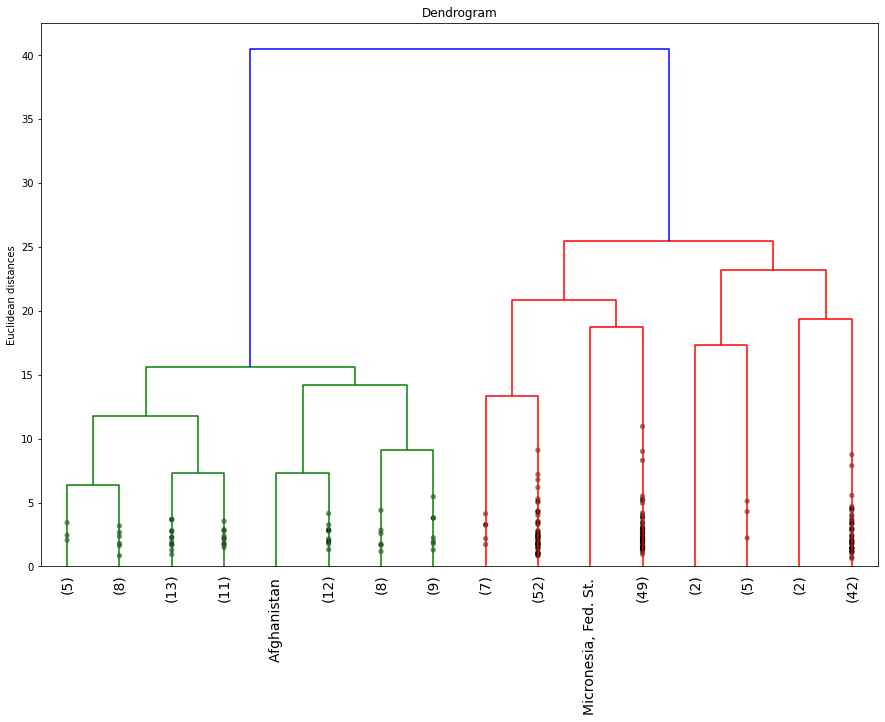

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.grid(False)
linkage_matrix = sch.linkage(X_scaled, method = 'ward')
dendrogram = sch.dendrogram(linkage_matrix, labels=X.index, p=3, truncate_mode='level', show_contracted=True) #method è il metodo specifico per calcolare la distanza
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [ ]:
sch.linkage(X_scaled, method = 'ward') #Questa è la matrice

## AGGLOMERATIVE CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model = model.fit(X_scaled)
labels = model.labels_

In [ ]:
labels = pd.Series(labels, index = X.index, name='labels')
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

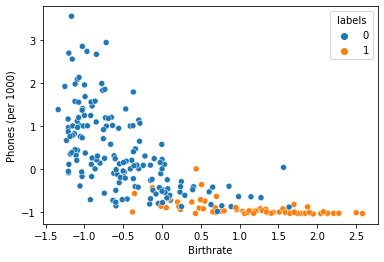

In [ ]:
labels_df = X_scaled.join(labels)
sns.scatterplot(x='Birthrate', y='Phones (per 1000)', data=labels_df, hue='labels')
plt.show()

**Here, I can easily see that the algorithm divided the countries in two clusters: the "developed" and "developing".**

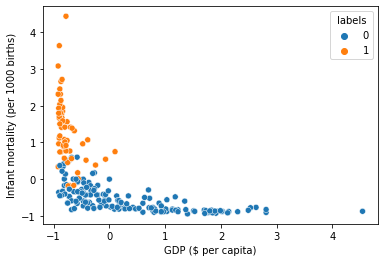

In [ ]:
labels_df = X_scaled.join(labels)
sns.scatterplot(x='GDP ($ per capita)', y='Infant mortality (per 1000 births)', data=labels_df, hue='labels')
plt.show()

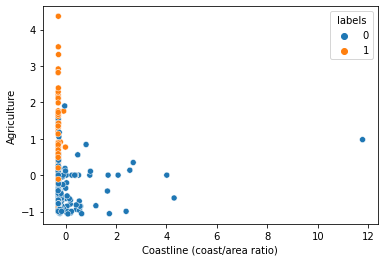

In [ ]:
labels_df = X_scaled.join(labels)
sns.scatterplot(x='Coastline (coast/area ratio)', y='Agriculture', data=labels_df, hue='labels')
plt.show()

In [ ]:
display(list(labels_df[labels_df['labels']==0].index))

['Albania ',
 'Algeria ',
 'American Samoa ',
 'Andorra ',
 'Anguilla ',
 'Antigua & Barbuda ',
 'Argentina ',
 'Armenia ',
 'Aruba ',
 'Australia ',
 'Austria ',
 'Bahamas, The ',
 'Bahrain ',
 'Barbados ',
 'Belarus ',
 'Belgium ',
 'Belize ',
 'Bermuda ',
 'Bolivia ',
 'Bosnia & Herzegovina ',
 'Brazil ',
 'British Virgin Is. ',
 'Brunei ',
 'Bulgaria ',
 'Canada ',
 'Cape Verde ',
 'Cayman Islands ',
 'Chile ',
 'China ',
 'Colombia ',
 'Cook Islands ',
 'Costa Rica ',
 'Croatia ',
 'Cuba ',
 'Cyprus ',
 'Czech Republic ',
 'Denmark ',
 'Dominica ',
 'Dominican Republic ',
 'Ecuador ',
 'Egypt ',
 'El Salvador ',
 'Estonia ',
 'Faroe Islands ',
 'Fiji ',
 'Finland ',
 'France ',
 'French Guiana ',
 'French Polynesia ',
 'Gaza Strip ',
 'Georgia ',
 'Germany ',
 'Gibraltar ',
 'Greece ',
 'Greenland ',
 'Grenada ',
 'Guadeloupe ',
 'Guam ',
 'Guernsey ',
 'Guyana ',
 'Hong Kong ',
 'Hungary ',
 'Iceland ',
 'India ',
 'Indonesia ',
 'Iran ',
 'Iraq ',
 'Ireland ',
 'Isle of Man ',
 

In [ ]:
print(labels_df[labels_df['labels']==1].index)

Index(['Afghanistan ', 'Angola ', 'Azerbaijan ', 'Bangladesh ', 'Benin ',
       'Bhutan ', 'Botswana ', 'Burkina Faso ', 'Burma ', 'Burundi ',
       'Cambodia ', 'Cameroon ', 'Central African Rep. ', 'Chad ', 'Comoros ',
       'Congo, Dem. Rep. ', 'Congo, Repub. of the ', 'Cote d'Ivoire ',
       'Djibouti ', 'East Timor ', 'Equatorial Guinea ', 'Eritrea ',
       'Ethiopia ', 'Gabon ', 'Gambia, The ', 'Ghana ', 'Guatemala ',
       'Guinea ', 'Guinea-Bissau ', 'Haiti ', 'Honduras ', 'Kenya ', 'Laos ',
       'Lesotho ', 'Liberia ', 'Madagascar ', 'Malawi ', 'Mali ',
       'Mauritania ', 'Mayotte ', 'Morocco ', 'Mozambique ', 'Namibia ',
       'Nepal ', 'Nicaragua ', 'Niger ', 'Nigeria ', 'Pakistan ',
       'Papua New Guinea ', 'Rwanda ', 'Senegal ', 'Sierra Leone ', 'Somalia ',
       'South Africa ', 'Sudan ', 'Swaziland ', 'Syria ', 'Tajikistan ',
       'Tanzania ', 'Togo ', 'Turkmenistan ', 'Uganda ', 'Uzbekistan ',
       'Vanuatu ', 'Yemen ', 'Zambia ', 'Zimbabwe '],
     

In [ ]:
print(labels_df[labels_df['labels']==2].index) #(non ho più il 3 indice in labels)

Index([], dtype='object', name='Country')


In [ ]:
label0 = labels_df.groupby('labels').describe().T

In [ ]:
pd.set_option('display.max_rows', None)
label0

labels                                               0             1
Population                         count  1.600000e+02  6.700000e+01
                                   mean   3.054120e-02 -7.293420e-02
                                   std    1.180686e+00  2.709453e-01
                                   min   -2.442653e-01 -2.426143e-01
                                   25%   -2.427159e-01 -2.102964e-01
                                   50%   -2.175739e-01 -1.619471e-01
                                   75%   -1.429575e-01 -6.944523e-02
                                   max    1.092594e+01  1.165193e+00
Area (sq. mi.)                     count  1.600000e+02  6.700000e+01
                                   mean   3.383719e-02 -8.080523e-02
                                   std    1.178642e+00  2.885981e-01
                                   min   -3.348897e-01 -3.346814e-01
                                   25%   -3.344695e-01 -2.801726e-01
                                   50%   -3.117103e-01 -1.972587e-01
                                   75%   -1.738515e-01  2.482824e-02
                                   max    9.223901e+00  1.067876e+00
Pop. Density (per sq. mi.)         count  1.600000e+02  6.700000e+01
                                   mean   7.305526e-02 -1.744603e-01
                                   std    1.185796e+00  9.004347e-02
                                   min   -2.288207e-01 -2.273115e-01
                                   25%   -2.061678e-01 -2.165963e-01
                                   50%   -1.676685e-01 -1.995425e-01
                                   75%   -7.683080e-02 -1.758181e-01
                                   max    9.593850e+00  3.889787e-01
Coastline (coast/area ratio)       count  1.600000e+02  6.700000e+01
                                   mean   1.130973e-01 -2.700830e-01
                                   std    1.174914e+00  9.366880e-02
                                   min   -2.934434e-01 -2.934434e-01
                                   25%   -2.901506e-01 -2.934434e-01
                                   50%   -2.589905e-01 -2.916411e-01
                                   75%    3.073960e-02 -2.873431e-01
                                   max    1.177769e+01  3.931189e-01
Net migration                      count  1.600000e+02  6.700000e+01
                                   mean   1.088204e-04 -2.598696e-04
                                   std    1.114263e+00  6.695580e-01
                                   min   -4.339274e+00 -1.019010e+00
                                   25%   -2.807728e-01 -1.430303e-01
                                   50%   -7.867312e-03 -7.867312e-03
                                   75%    4.192891e-01 -7.867312e-03
                                   max    3.861303e+00  4.750696e+00
Infant mortality (per 1000 births) count  1.600000e+02  6.700000e+01
                                   mean  -5.408581e-01  1.291601e+00
                                   std    3.563802e-01  8.548420e-01
                                   min   -9.469807e-01 -1.823707e-01
                                   25%   -8.276707e-01  7.681176e-01
                                   50%   -6.329546e-01  1.081716e+00
                                   75%   -3.415932e-01  1.696226e+00
                                   max    5.990595e-01  4.438359e+00
GDP ($ per capita)                 count  1.600000e+02  6.700000e+01
                                   mean   3.197338e-01 -7.635434e-01
                                   std    1.031390e+00  1.924146e-01
                                   min   -9.085488e-01 -9.185440e-01
                                   25%   -4.887491e-01 -8.835607e-01
                                   50%   -6.395179e-02 -8.185917e-01
                                   75%    9.805499e-01 -7.486251e-01
                                   max    4.538852e+00  1.009695e-01
Literacy (%)                       count  1.600000e+02  6.700000e+0

In [ ]:
new_df = labels_df['labels']

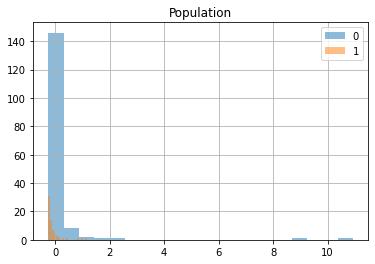

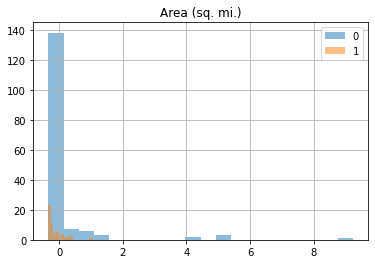

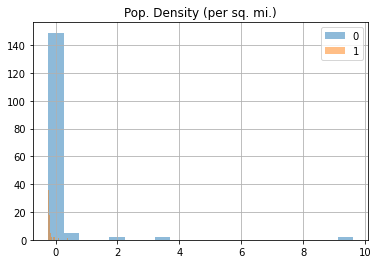

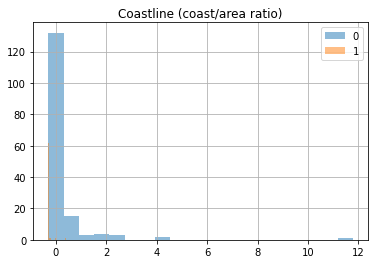

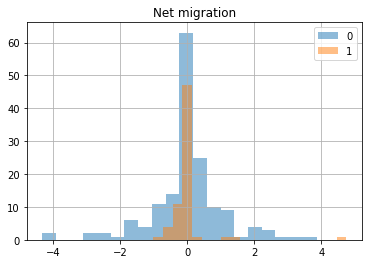

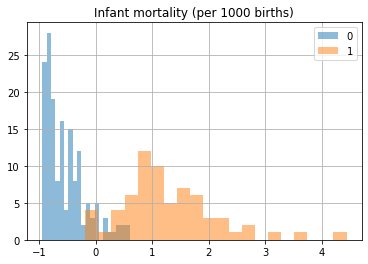

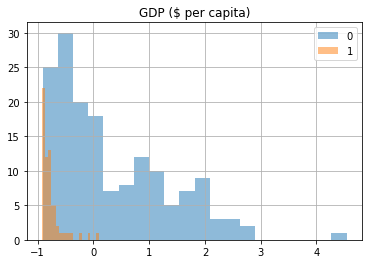

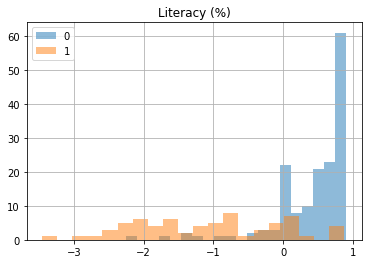

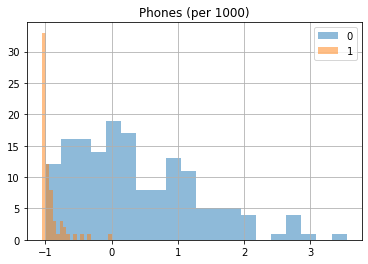

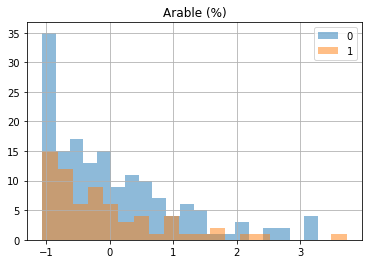

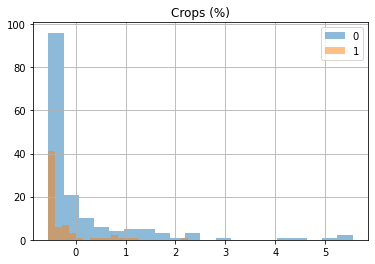

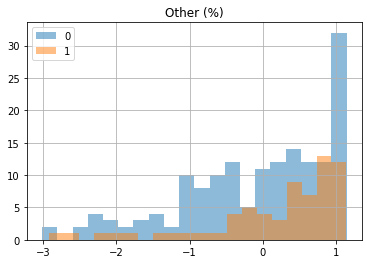

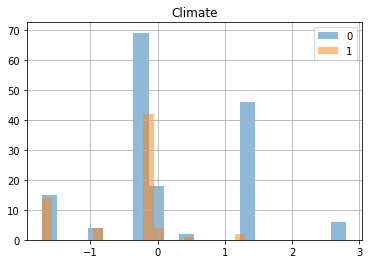

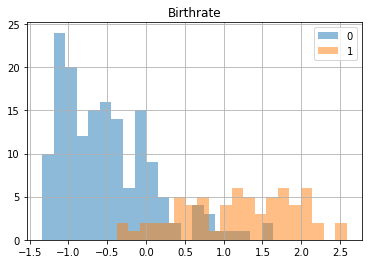

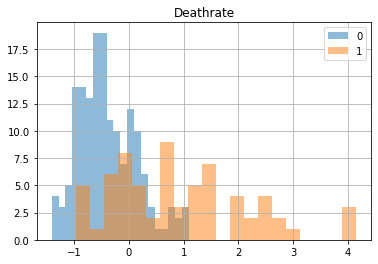

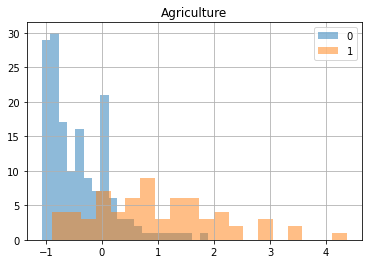

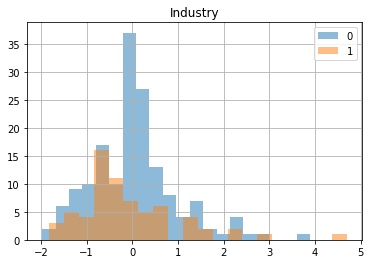

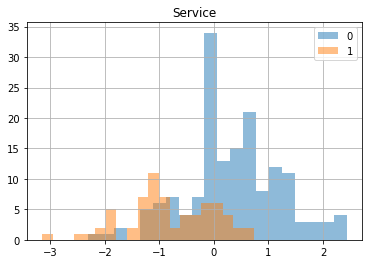

In [ ]:
for feature in X.columns:
  for cluster in [0,1]:
    cond= labels_df['labels']==cluster
    new_df = labels_df[cond].copy()
    new_df[feature].hist(label=cluster, alpha=0.5, bins=20)
  plt.title(feature)
  plt.legend()
  plt.show()